<img src='https://github.com/jtobelem-simplon/prepa-dp100/blob/master/images/top.png?raw=true'>

# Configuration (à lancer avant tous les notebooks)

In [1]:
# version de python
import platform
platform.python_version()

'3.8.5'

In [2]:
# la liste des packages installés
!conda list

# packages in environment at /home/lab/anaconda3/envs/azure:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
adal                      1.2.3                    pypi_0    pypi
applicationinsights       0.11.9                   pypi_0    pypi
argon2-cffi               20.1.0           py38h7b6447c_1  
attrs                     20.1.0                     py_0  
azure-common              1.1.25                   pypi_0    pypi
azure-core                1.5.0                    pypi_0    pypi
azure-graphrbac           0.61.1                   pypi_0    pypi
azure-identity            1.2.0                    pypi_0    pypi
azure-mgmt-authorization  0.60.0                   pypi_0    pypi
azure-mgmt-containerregistry 2.8.0                    pypi_0    pypi
azure-mgmt-keyvault       2.2.0                    pypi_0    pypi
azure-mgmt-network        10.2.0                   pypi_0    pypi
azure-mgmt-resource       9

In [3]:
# version de la SDK azureml
import azureml.core
print("Ready to use Azure ML", azureml.core.VERSION)

Ready to use Azure ML 1.8.0


Si le notebook est executé en dehors d'Azure, il faut télécharger le fichier config.json depuis le portail https://portal.azure.com/, et le mettre dans le workspace qui contient le notebook.

Si le notebook est exécuté directement depuis le workspace Azure, le fichier de config devrait déjà être là.

In [4]:
# connexion au workspace
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws.name, "loaded")

jt-dp100 loaded


# Lancer une experience

https://docs.microsoft.com/en-us/python/api/azureml-core/azureml.core.experiment.experiment?view=azure-ml-py

    An Experiment is a container of trials that represent multiple model runs.

In [5]:
from azureml.core import Experiment

# Create an Azure ML experiment in your workspace
experiment = Experiment(workspace = ws, name = "titanic-explore-experiment")

# Start logging data from the experiment
run = experiment.start_logging()
print("Starting experiment:", experiment.name)

Starting experiment: titanic-explore-experiment


## logger des infos

In [6]:
import pandas as pd

# load the data from a local file
titanic = pd.read_csv('data/titanic/train.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Count the rows and log the result
row_count = (len(titanic))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))

Analyzing 891 rows of data


In [8]:
#!pip install seaborn --upgrade

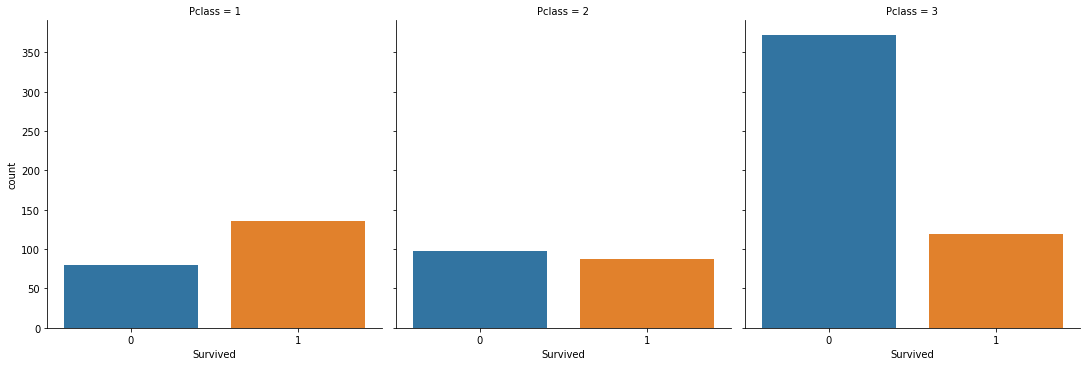

In [9]:
# log le nombre de survivants par classe
import seaborn as sns

fig = sns.catplot(x = "Survived", kind = "count", col = "Pclass", data =titanic)

run.log_image(name = 'distribution par classe', plot = fig)

## sauver un fichier csv

In [10]:
titanic.sample(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
717,718,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
239,240,0,2,"Hunt, Mr. George Henry",male,33.0,0,0,SCO/W 1585,12.2750,NaN,S


In [11]:
# Car les noms contiennent des "," et des " ", pas pratique pour le csv
titanic.drop("Name", inplace=True, axis=1)

In [12]:
# Save a sample of the data and upload it to the experiment output
titanic.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name = 'outputs/sample.csv', path_or_stream = 'sample.csv')

In [13]:
# Complete the run
run.complete()

## résultats

In [14]:
import json

# Get run details
details = run.get_details()
print(details)

# Get logged metrics
metrics = run.get_metrics()
print(json.dumps(metrics, indent=2))

# Get output files
files = run.get_file_names()
print(json.dumps(files, indent=2))

{'runId': '5a5f5825-0ef1-41ef-9b4d-2d669c4d5a02', 'target': 'sdk', 'status': 'Completed', 'startTimeUtc': '2020-09-14T15:52:33.241164Z', 'endTimeUtc': '2020-09-14T15:52:42.713449Z', 'properties': {'azureml.git.repository_uri': 'https://github.com/jtobelem-simplon/prepa-dp100.git', 'mlflow.source.git.repoURL': 'https://github.com/jtobelem-simplon/prepa-dp100.git', 'azureml.git.branch': 'master', 'mlflow.source.git.branch': 'master', 'azureml.git.commit': '2d45093ddce878c37e597457953a961b3ad2cf28', 'mlflow.source.git.commit': '2d45093ddce878c37e597457953a961b3ad2cf28', 'azureml.git.dirty': 'True', 'ContentSnapshotId': 'ea028fc6-4c29-4813-ab54-a47770c943bd'}, 'inputDatasets': [], 'logFiles': {}}
{
  "observations": 891,
  "distribution par classe": "aml://artifactId/ExperimentRun/dcid.5a5f5825-0ef1-41ef-9b4d-2d669c4d5a02/distribution par classe_1600098761.png"
}
[
  "distribution par classe_1600098761.png",
  "outputs/sample.csv"
]


In [15]:
from azureml.widgets import RunDetails

RunDetails(run).show()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

# Lancer une expérience avec un script

## création d'un dossier qui contient le script et les données

In [16]:
import os, shutil

# Create a folder for the experiment files
folder_name = 'titanic-experiment-files'
experiment_folder = './' + folder_name
os.makedirs(folder_name, exist_ok=True)

# Copy the data file into the experiment folder
shutil.copy('data/titanic/train.csv', os.path.join(folder_name, "titanic.csv"))

'titanic-experiment-files/titanic.csv'

le code suivant va créer un script titanic_experiment.py :

In [17]:
%%writefile $folder_name/titanic-experiment.py

from azureml.core import Run
import pandas as pd

# Get the experiment run context
run = Run.get_context()

# load the data from a local file
titanic = pd.read_csv('titanic.csv')

# Count the rows and log the result
row_count = (len(titanic))
run.log('observations', row_count)
print('Analyzing {} rows of data'.format(row_count))

# Save a sample of the data and upload it to the experiment output
titanic.sample(100).to_csv('sample.csv', index=False, header=True)
run.upload_file(name = 'outputs/sample.csv', path_or_stream = 'sample.csv')

# Complete the run
run.complete()

Writing titanic-experiment-files/titanic-experiment.py


## execution de l'expérience

In [18]:
import os
import sys
from azureml.core import Experiment, RunConfiguration, ScriptRunConfig
from azureml.widgets import RunDetails

# create a new RunConfig object
experiment_run_config = RunConfiguration()

# Create a script config
src = ScriptRunConfig(source_directory=experiment_folder, 
                      script='titanic-experiment.py',
                      run_config=experiment_run_config) 

# submit the experiment
experiment = Experiment(workspace = ws, name = 'titanic-experiment')
run = experiment.submit(config=src)
RunDetails(run).show()
run.wait_for_completion()

_UserRunWidget(widget_settings={'childWidgetDisplay': 'popup', 'send_telemetry': False, 'log_level': 'INFO', '…

{'runId': 'titanic-experiment_1600098764_2e9a663e',
 'target': 'local',
 'status': 'Finalizing',
 'startTimeUtc': '2020-09-14T15:52:46.562367Z',
 'properties': {'_azureml.ComputeTargetType': 'local',
  'ContentSnapshotId': 'b013a093-7d4a-4824-a7b4-1b1c3fdb81e3',
  'azureml.git.repository_uri': 'https://github.com/jtobelem-simplon/prepa-dp100.git',
  'mlflow.source.git.repoURL': 'https://github.com/jtobelem-simplon/prepa-dp100.git',
  'azureml.git.branch': 'master',
  'mlflow.source.git.branch': 'master',
  'azureml.git.commit': '2d45093ddce878c37e597457953a961b3ad2cf28',
  'mlflow.source.git.commit': '2d45093ddce878c37e597457953a961b3ad2cf28',
  'azureml.git.dirty': 'True'},
 'inputDatasets': [],
 'runDefinition': {'script': 'titanic-experiment.py',
  'scriptType': None,
  'useAbsolutePath': False,
  'arguments': [],
  'sourceDirectoryDataStore': None,
  'framework': 'Python',
  'communicator': 'None',
  'target': 'local',
  'dataReferences': {},
  'data': {},
  'outputData': {},
  'jo

# Ne pas oublier à la fin de l'expérience!!
(si votre travail à utilisé une instance de calcul)

<img src='https://github.com/jtobelem-simplon/prepa-dp100/blob/master/images/down.png?raw=true'>



In [19]:
# stop toutes les instances de calcul
from azureml.core.compute import ComputeTarget, AmlCompute, ComputeInstance
from azureml.core.compute_target import ComputeTargetException

for compute in ComputeTarget.list(ws):
    if type(compute) is ComputeInstance and compute.get_status().state == 'Running':
        print('try to stop compute', compute.name)
        compute.stop(show_output=True)

In [20]:
# liste tous les compute pour vérifier qu'elles sont éteintes
for compute in ComputeTarget.list(ws):
    if type(compute) is ComputeInstance:
        print(compute.name, compute.get_status())

vm-ds3-v2 {
  "errors": [],
  "creationTime": "2020-05-27T10:12:38.674242+00:00",
  "createdBy": {
    "userId": "c88a830e-65d5-4e6d-a890-6d4497d2e6bd",
    "userOrgId": "0840dabf-0881-4071-9392-f25b2728592f"
  },
  "modifiedTime": "2020-09-10T13:17:50.819127+00:00",
  "state": "Stopped",
  "vmSize": "STANDARD_DS3_V2"
}


# Ressources

[api azure](https://docs.microsoft.com/en-us/python/api/azureml-core)

[parcours d'apprentissage microsoft](https://docs.microsoft.com/fr-fr/learn/paths/build-ai-solutions-with-azure-ml-service/)

[le repository microsoft](https://github.com/MicrosoftDocs/mslearn-aml-labs.git)